# PCA analysis on Nisei Matrix

Given the nisei_matrix.csv, run PCA analysis to figure out which lemma/tokens should be used for clustering


_why PCA (principal component analysis)?_
1. saves data / space
2. quicker running time
3. reduces overfitting (and thus overtraining) 

In [215]:
# libraries and such 

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style()

# PCA libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [216]:
data = (pd.read_csv('nisei_matrix.csv', 
                    index_col = 0)) # if you don't say this, you get 2 columns of indeces

data.head()

,念,世,れる,—,座,把,あー,十,万,内,...,学生,兵,員,母,知,婚,盛,移民,良,〕
0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
data = data.fillna(0) # remove all na values to be 0

## Scaling the Data

We scale the data so the average is 0 and the sum is 1. this is so all attributes carry equal weight. Because of the nature of this matrix, it won't matter much but will be useful to do anyway incase we add a distance metric to the values in our matrix that will skew the averages. 

In [218]:
# making scaler:

scaling = StandardScaler() 

# fit the standardizer then scale the data 
scaling.fit(data)
scaled_data = scaling.transform(data)

## Determining the Number of Components for our data 

with this, we can choose different number of components we want

In [219]:
# setting the components: 

n = 10 # just to begin with, determines the dimensionality of our matrix 
principal = PCA(n_components = n)
principal.fit(scaled_data)
X = principal.transform(scaled_data)



In [220]:
X.shape # see how the shape is unchanged, now we can check the components 

(400, 10)

In [221]:
principal.components_.shape

(10, 410)

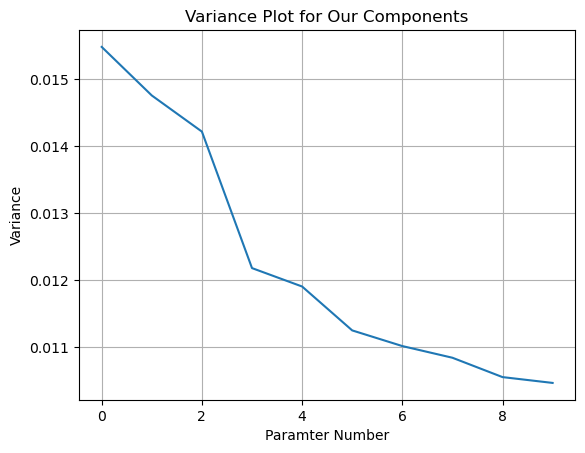

In [222]:
plt.plot(np.arange(0,n),principal.explained_variance_ratio_)
plt.title('Variance Plot for Our Components')
plt.xlabel('Paramter Number')
plt.grid()
plt.ylabel('Variance');

_based off of inspection, it is difficult to tell where the "elbow" of the arm is, but I will say roughly 50 is a good number to pick_

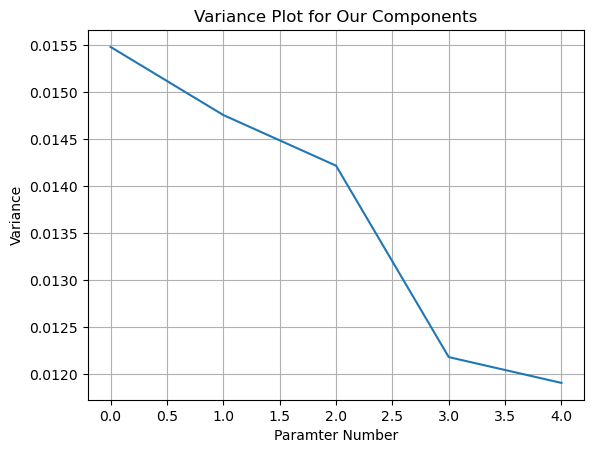

In [223]:
# so let's plot just the first 5 and see how it looks again: 

plt.plot(np.arange(0,5),principal.explained_variance_ratio_[0:5])
plt.title('Variance Plot for Our Components')
plt.xlabel('Paramter Number')
plt.grid()
plt.ylabel('Variance');

_seems that most of the information (I'll be it it's not that much to begin with), can be captured with the first 3 terms). This is also good because we can actually plot this and see if there are clusters in any way_

In [224]:
# now we can reduce the size of X to only include the first n we want 
n = 3
principal = PCA(n_components = n)
principal.fit(scaled_data)
reduced_X = principal.transform(scaled_data)

_You can see that the first principal component has a larger spread than the second component. You can also see that the cluster of values seems to be centered at (0,0), which is good because that means the scaler worked correctly._

In [225]:
PCA_X = pd.DataFrame(reduced_X)

PCA_X

,0,1,2
0,-2.534072,-1.129234,2.383097
1,-2.192395,-3.717821,1.190627
2,-3.216453,-2.699604,0.014101
3,-3.739570,-0.642134,1.027848
4,-3.423825,-1.016293,1.248113
...,...,...,...
395,1.419363,0.389408,-1.486535
396,1.603693,1.246596,-1.271277
397,1.862984,1.578307,-0.327658
398,4.341911,1.790587,-4.019729


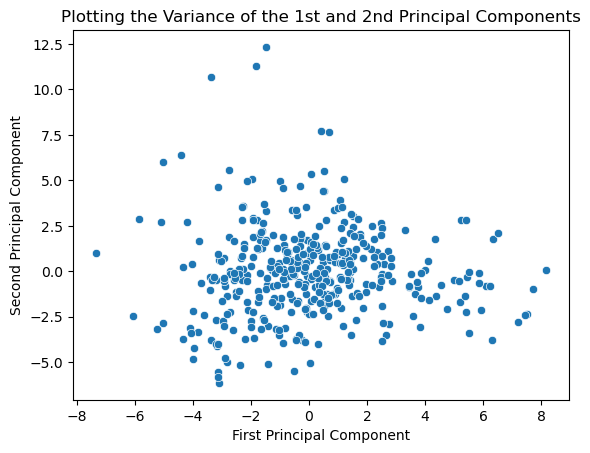

In [226]:
# Let's visualize the first 2 components: 

sns.scatterplot(data = PCA_X, x = 0, y = 1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Plotting the Variance of the 1st and 2nd Principal Components');

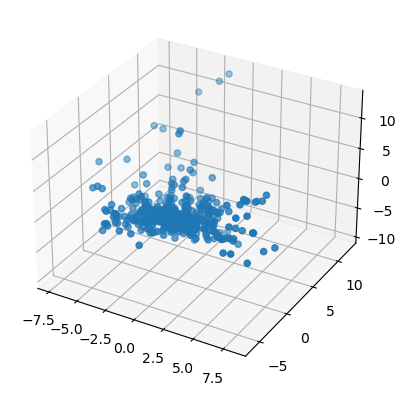

In [227]:
# now let's plot all of it: 

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(PCA_X[0], PCA_X[1], PCA_X[2])

## CLustering Attempt!

Let's see if we can run a clustering algorithm on the PCA_X matrix

In [228]:
from sklearn.cluster import KMeans

In [229]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(PCA_X) 
labels = kmeans.labels_

centers = kmeans.cluster_centers_

In [230]:
print("Labels: ", labels)

Labels:  [1 1 1 1 1 0 2 0 2 1 1 1 1 1 1 1 1 2 2 2 0 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 1 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 1 2 0 0 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 2 0 0 0 2 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 0 0 0 0 0
 2 1 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 1 1 1 1 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 0 2 1 2 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 1 1 1 1 1
 1 1 1 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 1 2 1 2 2 1 1 1
 1 2 2 1 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 0 0 2 2 2 2 1 1 2 2 2 1
 1 2 2 2 1 2 1 1 1 1 1 2 1 2 0 0 0 0 1 1 2 2 1 2 2 2 2 1 1 1 2 2 1 1 2 0 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [231]:
print('Centers: ', centers)

Centers:  [[ 4.22629276 -0.96024583  1.39269317]
 [-1.74276694 -1.94282327  0.57260967]
 [-0.07642755  1.53136629 -0.76762605]]


_so in short, that's kind of it~ We've identified 3 groups that might be semi-correct. to actually test for accuracy, we would need to manually refer to the data points themselves and see if the clustering is what we expect. I want to plot this to see if there's at least visually some trend occuring that makes sense._


_One caveat is that the clustering could be slightly different each time we run this algorithm, as there is no guarantee it will reach a global min and will settle for a local min, and therefore not be fully its optimized version. For our purposes and given the crude nature of this data set to begin with, I don't think it will affect the data more than the implicit errors already present_ 


In [232]:
clustered_data = PCA_X.rename(columns = {0: 'PC1', 1: 'PC2', 2: 'PC3'})

In [233]:
clustered_data = clustered_data.assign(**{'Cluster': labels})

In [234]:
num_in_clusters = clustered_data.groupby('Cluster').size()

number in cluster 0:  59
number in cluster 1:  134
number in cluster 2:  207


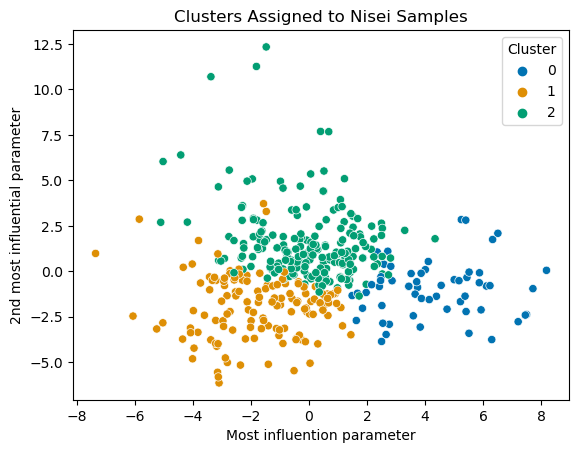

In [235]:
# now let's plot but with the labels: 
i = 0
for n in num_in_clusters: 
    print(f'number in cluster {i}: ',n)
    i += 1
(sns.scatterplot(data = clustered_data, 
                 x = 'PC1', 
                 y = 'PC2', 
                 hue = 'Cluster', # splits the color of the point by the cluster it is in
                 palette = 'colorblind' ))
plt.title("Clusters Assigned to Nisei Samples")
plt.xlabel('Most influention parameter')
plt.ylabel('2nd most influential parameter')
plt.show()


## So what's next? 

1. Verify the accruracy of the classification by examining the data points that were clustered together. 
> one crude way of doing that would be to see if data points that originated from the same original text ended up being classified in the same cluster. This will give us an idea of the accuracy, as we can make an assumption that if the points come from the same text, then their usages are more likely to be similar. 

2. actually refer to the original text (links are given in the original output.json file) and see if points in the same cluster are using nisei in the same way. 

3. collect more data to create a more robust model. Since we were only able to examine using 100 data points, being able to use the entire dataset would give us thousands of points to refer to! That would hopefully greatly increase the accuracy of the model

## What I'm actually planning to do next: 

do point 1, and see if the data points from the same original text received the same classification (will be found in a separate notebook)

So I will export this dataframe! 

In [236]:
clustered_data

,PC1,PC2,PC3,Cluster
0,-2.534072,-1.129234,2.383097,1
1,-2.192395,-3.717821,1.190627,1
2,-3.216453,-2.699604,0.014101,1
3,-3.739570,-0.642134,1.027848,1
4,-3.423825,-1.016293,1.248113,1
...,...,...,...,...
395,1.419363,0.389408,-1.486535,2
396,1.603693,1.246596,-1.271277,2
397,1.862984,1.578307,-0.327658,2
398,4.341911,1.790587,-4.019729,2


In [237]:
from pathlib import Path  
filepath = Path('C:\\Users\\alica\\Documents\\URAP\\URAP_NLP\\clustered_matrix.csv')    # set this to whatever path you want, 
                                                                                    # but the name of the csv should be unchanged
filepath.parent.mkdir(parents=True, exist_ok=True)  # makes a directory for the CSV file to be written into 
clustered_data.to_csv(filepath)   